<h1 align="center">Book Recommender: Discover Your Next Favorite Book</h1>  
<p align="center">
    <img src="https://images.pexels.com/photos/14104040/pexels-photo-14104040.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=750&w=1260" width="500" height="333">
</p>
<p align="center">
    <em>Photo by Vladimir Srajber from Pexels</em>
</p>

## Abstract
The book recommendation system is an algorithmic approach to help users discover new books that are tailored to their preferences. With the exponential growth of online bookstores and digital libraries, it has become increasingly difficult for users to find books that match their interests. The book recommendation system solves this problem by analyzing user behavior, such as book ratings and search queries, and using this data to generate personalized book recommendations.

The system uses machine learning and data mining techniques to model user preferences and identify patterns in book data. Collaborative filtering and content-based filtering are two popular approaches to building book recommendation systems. Collaborative filtering analyzes user behavior to find similarities between users and recommend books that similar users have enjoyed. Content-based filtering, on the other hand, analyzes book data to identify key features and recommend books that are similar in content to books that the user has enjoyed in the past.

In this book, we will explore the various techniques used to build a book recommendation system, including data preprocessing, feature engineering, and model selection. We will also discuss how to evaluate the performance of a recommendation system and optimize its algorithms for improved accuracy. With this knowledge, readers will be able to build their own book recommendation systems that can help users discover their next favorite read.

## Data Collection and Preprocessing
The data collection and preprocessing phase of building a book recommendation system involves gathering relevant data about books and users from various sources and preparing it for model training. This includes cleaning the data, removing duplicates, and transforming it into a suitable format. Text normalization techniques are applied to ensure consistency, and additional features may be engineered to enhance the model's performance. The preprocessed data is then split into training and testing sets for evaluation. This phase ensures that the dataset is of high quality and ready for subsequent stages of model development.

### Importing Libraries

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.probability import FreqDist
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import tensorflow as tf
import torch as th
import re
import pickle as pkl
import warnings
from unidecode import unidecode
from scipy.stats import f_oneway
import requests
from IPython.display import Image, display, HTML
from wordcloud import WordCloud

### Loading the Data

In [2]:
# Load the books data into a DataFrame
df = pd.read_csv('dataset/books_1.Best_Books_Ever.csv')

### Viewing the Data

#### Column Descriptions

**title**	The title of the book. (String)

**series**	The series the book belongs to, if any. (String)

**author**	The author of the book. (String)

**rating**	The rating of the book on a scale of 1-5. (Integer)

**description**	A brief description of the book. (String)

**language**	The language the book is written in. (String)

**isbn**	The ISBN number of the book. (String)

**genres**	The genres the book belongs to. (String)

**characters**	The characters featured in the book. (String)

**bookFormat**	The format of the book (e.g. paperback, hardcover, etc.). (String)

**edition**	The edition of the book. (String)

**pages**	The number of pages in the book. (Integer)

**publisher**	The publisher of the book. (String)

**publishDate**	The date the book was published. (Date)

**firstPublishDate**	The date the book was first published. (Date)

**awards**	Any awards the book has won. (String)

**numRatings**	The number of ratings the book has received. (Integer)

**ratingsByStars**	The ratings the book has received broken down by star rating. (Integer)

**likedPercent**	The percentage of people who liked the book. (Integer)

**setting**	The setting of the book. (String)

**coverImg**	The cover image of the book. (Image)

**bbeScore**	The best books ever score of the book. (Integer)

**bbeVotes**	The number of votes the book has received. (Integer)

**price**	The price of the book. (Integer)

In [3]:
# Check the first few rows of df
df.head()

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",...,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",...,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",...,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95.0,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",...,01/28/13,[],2998241,"['1617567', '816659', '373311', '113934', '767...",94.0,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",...,10/05/05,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1


In [4]:
# Check the shape of df
df.shape

(52478, 25)

In [5]:
# Get the column names of df
df.columns

Index(['bookId', 'title', 'series', 'author', 'rating', 'description',
       'language', 'isbn', 'genres', 'characters', 'bookFormat', 'edition',
       'pages', 'publisher', 'publishDate', 'firstPublishDate', 'awards',
       'numRatings', 'ratingsByStars', 'likedPercent', 'setting', 'coverImg',
       'bbeScore', 'bbeVotes', 'price'],
      dtype='object')

In [6]:
# Get information about df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52478 entries, 0 to 52477
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bookId            52478 non-null  object 
 1   title             52478 non-null  object 
 2   series            23470 non-null  object 
 3   author            52478 non-null  object 
 4   rating            52478 non-null  float64
 5   description       51140 non-null  object 
 6   language          48672 non-null  object 
 7   isbn              52478 non-null  object 
 8   genres            52478 non-null  object 
 9   characters        52478 non-null  object 
 10  bookFormat        51005 non-null  object 
 11  edition           4955 non-null   object 
 12  pages             50131 non-null  object 
 13  publisher         48782 non-null  object 
 14  publishDate       51598 non-null  object 
 15  firstPublishDate  31152 non-null  object 
 16  awards            52478 non-null  object

In [7]:
# Get summary statistics for the numeric columns in df1
df.describe()

,rating,numRatings,likedPercent,bbeScore,bbeVotes
count,52478.000000,5.247800e+04,51856.000000,5.247800e+04,52478.000000
mean,4.021878,1.787865e+04,92.231545,1.984023e+03,22.529003
std,0.367146,1.039448e+05,5.990689,3.515314e+04,369.158541
min,0.000000,0.000000e+00,0.000000,0.000000e+00,-4.000000
25%,3.820000,3.410000e+02,90.000000,8.400000e+01,1.000000
50%,4.030000,2.307000e+03,94.000000,9.700000e+01,1.000000
75%,4.230000,9.380500e+03,96.000000,1.870000e+02,2.000000
max,5.000000,7.048471e+06,100.000000,2.993816e+06,30516.000000


### Data Preprocessing

In [8]:
# Drop columns that are not needed for analysis
df.drop(['series', 'bookId', 'characters', 'bookFormat', 'edition', 'publisher', 'firstPublishDate', 'awards', 'setting', 'bbeScore', 'bbeVotes', 'price'], axis=1, inplace=True)

In [9]:
# Check the first few rows of df
df.head()

,title,author,rating,description,language,isbn,genres,pages,publishDate,numRatings,ratingsByStars,likedPercent,coverImg
0,The Hunger Games,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",374,09/14/08,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,https://i.gr-assets.com/images/S/compressed.ph...
1,Harry Potter and the Order of the Phoenix,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",870,09/28/04,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,https://i.gr-assets.com/images/S/compressed.ph...
2,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...",324,05/23/06,4501075,"['2363896', '1333153', '573280', '149952', '80...",95.0,https://i.gr-assets.com/images/S/compressed.ph...
3,Pride and Prejudice,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"['Classics', 'Fiction', 'Romance', 'Historical...",279,10/10/00,2998241,"['1617567', '816659', '373311', '113934', '767...",94.0,https://i.gr-assets.com/images/S/compressed.ph...
4,Twilight,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...",501,09/06/06,4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,https://i.gr-assets.com/images/S/compressed.ph...


In [10]:
# Check for missing values
df.isnull().sum()

title                0
author               0
rating               0
description       1338
language          3806
isbn                 0
genres               0
pages             2347
publishDate        880
numRatings           0
ratingsByStars       0
likedPercent       622
coverImg           605
dtype: int64

In [11]:
# Replace empty brackets with 0 in the 'ratingsByStars' column
df['ratingsByStars'] = df['ratingsByStars'].str.replace('[\[\]]', '0')

# Split the 'ratingsByStars' column into separate columns for each rating
ratings = df['ratingsByStars'].str.split(',', expand=True)
ratings.columns = ['5_stars', '4_stars', '3_stars', '2_stars', '1_star']
df = pd.concat([df, ratings], axis=1)

# Remove the apostrophes from '5_stars', '4_stars', '3_stars', '2_stars', and '1_star' columns
df['5_stars'] = df['5_stars'].str.replace("'", '')
df['4_stars'] = df['4_stars'].str.replace("'", '')
df['3_stars'] = df['3_stars'].str.replace("'", '')
df['2_stars'] = df['2_stars'].str.replace("'", '')
df['1_star'] = df['1_star'].str.replace("'", '')

# Drop the 'ratingsByStars' column
df.drop('ratingsByStars', axis=1, inplace=True)

In [12]:
# Replace missing values in the '5_stars', '4_stars', '3_stars', '2_stars', and '1_star' columns with 0
df['5_stars'] = df['5_stars'].fillna(0)
df['4_stars'] = df['4_stars'].fillna(0)
df['3_stars'] = df['3_stars'].fillna(0)
df['2_stars'] = df['2_stars'].fillna(0)
df['1_star'] = df['1_star'].fillna(0)

# Convert the '5_stars', '4_stars', '3_stars', '2_stars', and '1_star' columns to integers
df['5_stars'] = df['5_stars'].astype(int)
df['4_stars'] = df['4_stars'].astype(int)
df['3_stars'] = df['3_stars'].astype(int)
df['2_stars'] = df['2_stars'].astype(int)
df['1_star'] = df['1_star'].astype(int)

In [13]:
# Add a new column called 'like_pct' that adds the values in the '5_stars', '4_stars', and'3_stars', and divides them by the values in the 'numRatings' column
df['liked_pct'] = ((df['5_stars'] + df['4_stars'] + df['3_stars']) / df['numRatings']) * 100
df['liked_pct'] = df['liked_pct'].round(0)

# Drop likedPercent column
df.drop('likedPercent', axis=1, inplace=True)

In [14]:
# Replace missing values in like_pct column with 0
df['liked_pct'] = df['liked_pct'].fillna(0)

In [15]:
# Fill description text with string 'No description available'
df['description'] = df['description'].fillna('No description available')

In [16]:
# Fill language text with string 'Unknown'
df['language'] = df['language'].fillna('Unknown')

In [17]:
# Fill pages text with string 'No pages available'
df['pages'] = df['pages'].fillna('No pages available')

In [18]:
# Define a function to extract the year from a valid date
def extract_year(date_str):
    if pd.isnull(date_str):
        return 2999
    elif isinstance(date_str, str):
        try:
            year = pd.to_datetime(date_str, errors='coerce').year  # Extract the year
            if pd.notnull(year):
                return int(year)
            else:
                return 2999
        except ValueError:
            return 2999
    else:
        return 2999

# Apply the extract_year function to the 'publishDate' column
df['publishDate'] = df['publishDate'].apply(extract_year)

# Define a function to modify the year
def modify_year(year):
    if year > 2020 and year < 2999:
        year_str = str(year)
        if year_str.startswith('20'):
            year_str = '19' + year_str[2:]
        return int(year_str)
    return year

# Apply the modify_year function to the 'publishDate' column
df['publishDate'] = df['publishDate'].apply(modify_year)

In [19]:
# view publishDate column
df['publishDate']

0        2008
1        2004
2        2006
3        2000
4        2006
         ... 
52473    2011
52474    2011
52475    2011
52476    2011
52477    2011
Name: publishDate, Length: 52478, dtype: int64

In [20]:
# Check for missing values
df.isnull().sum()

title            0
author           0
rating           0
description      0
language         0
isbn             0
genres           0
pages            0
publishDate      0
numRatings       0
coverImg       605
5_stars          0
4_stars          0
3_stars          0
2_stars          0
1_star           0
liked_pct        0
dtype: int64

In [21]:
# Drop the duplicated rows
df.drop_duplicates(inplace=True)

In [22]:
# Define a dictionary to map genres to broader categories
genre_map = {
    'Romance': ['Romance', 'Historical Romance', 'Paranormal Romance', 'Contemporary Romance', 'Erotic Romance', 'Interracial Romance', 
                'M M Romance', 'M F Romance', 'LGBT', 'Lesbian Romance', 'Fan Fiction', 'Romantic', 'BDSM', 'Love', 'Erotica', 'Menage', 
                'Reverse Harem'],
    'Science Fiction': ['Science Fiction', 'Dystopia', 'Steampunk', 'Time Travel', 'Cyberpunk', 'Alternate History', 'Space', 'Aliens', 
                        'Speculative Fiction', 'Science Fiction Fantasy'],
    'Fantasy': ['Fantasy', 'Fiction Fantasy', 'Urban Fantasy', 'Epic', 'High Fantasy', 'Dark Fantasy', 'Mythology', 'Fairy Tales', 
                'Fairy Tale Retellings', 'Fairies', 'Elves', 'Folklore'],
    'Historical Fiction': ['Historical Fiction', 'Historical Romance', 'World War II', 'Regency'],
    'Contemporary': ['Contemporary', 'New Adult', 'Realistic Fiction', 'Chick Lit'],
    'Young Adult': ['Young Adult', 'Teen', 'Middle Grade', 'High School'],
    'Comics': ['Comics', 'Manga', 'Dc Comics', 'Comic Strips', 'Harlequin Heartwarming'],
    'Mystery': ['Crime', 'Mystery', 'Thriller', 'Suspense', 'Mystery Thriller', 'True Crime', 'Cozy Mystery', 'Historical Mystery', 
                'Detective', 'Espionage', 'Action', 'Psychological Thriller' ],
    'Horror': ['Horror', 'Paranormal', 'Gothic', 'Supernatural', 'Ghost Stories'],
    'LGBTQ+': ['LGBTQ+', 'LGBTQ', 'Queer', 'Asexual'],
    'Literary Fiction': ['Literary Fiction', 'Classics', 'Novels', 'Literary Criticism', 'Anthologies'],
    'Poetry': ['Poetry'],
    'Foreign Literature': ['Language', 'Finnish Literature', 'Hungarian Literature', 'Japanese Literature', 'French Literature', 
                           'Indian Literature', 'British Literature', 'Egyptian Literature'],
    'Biography/Autobiography': ['Biography/Autobiography', 'Memoir', 'True Story'],
    'History': ['History', 'Historical', 'Ancient History', 'Medieval'],
    'Science': ['Science', 'Science/Popular Science', 'Popular Science', 'Space', 'Computer Science', 'Dogs', 'Medicine', 'Computers', 
                'Artificial Intelligence', 'Metaphysics', 'Physics', 'Ecology', 'Chemistry'],
    'Self-Help': ['Self-Help', 'Personal Development', 'Prayer', 'Christian Living', 'Counselling', 'Mental Illness'],
    'Business/Finance': ['Business/Finance', 'Economics', 'Management', 'Money'],
    'Health/Fitness': ['Health/Fitness', 'Medical', 'Martial Arts', 'Nutrition', 'Mountaineering', 'Cycling', 'Outdoors'],
    'Memoir': ['Memoir', 'Autobiography', 'Memoirs'],
    'True Crime': ['True Crime'],
    'Politics/Current Affairs': ['Politics/Current Affairs', 'Political', 'Current Affairs'],
    'Psychology/Social Sciences': ['Psychology/Social Sciences', 'Psychology', 'Social Sciences'],
    'Reference': ['Reference', 'Reference Books', 'Law', 'Communication', 'Survival', 'Sewing', 'Gardening', 'Aviation', 'Nursing', 'Teaching'],
    'Religion/Spirituality': ['Spirituality', 'Religion', 'Christianity', 'New Testament', 'Church', 'Holiday', 'Halloween', 'Magick', 
                              'Witchcraft', 'Magical Realism', 'Witches'],
    'Cooking': ['Cooking', 'Cookbooks'],
    'Travel': ['Travel', 'Travelogue'],
    'Cultural/Geography': ['Geography', 'Italy', 'India', 'Israel', 'Australia', 'Brazil', 'Romania', 'Scotland', 'Cultural', 'Iran', 
                           'Ethiopia', 'New York'],
    'Other': ['Plays', 'Pirates', 'Role Playing Games', 'Forgotten Realms', 'Lds', 'Comedy', 'Games', 'Family', 'Games', 
              'Conspiracy Theories', 'Diary', 'Baha I', 'Chapter Books', 'Journalism', 'Nerd', '21st Century', 
              'Journal', 'Unfinished', 'Pulp', 'Gaming', 'Academic', 'Own', 'Warcraft', 'Semiotics']
}


In [23]:
# Replace empty brackets with empty strings in the 'genres' column
df['genres'] = df['genres'].str.replace('[\[\]]', '')

# Split the 'genres' column into separate columns for each genre
genres = df['genres'].str.split(',', expand=True)
genres.columns = [f'genre{i}' for i in range(1, 11)]
df = pd.concat([df, genres], axis=1)

# Remove apostrophes from genre columns and fill missing values with 'Unknown'
for col in genres.columns:
    df[col] = df[col].str.replace("'", '').fillna('Unknown')


def map_genres(genre):
    for key, value in genre_map.items():
        if genre in value:
            return key
    return 'Other'


# Apply the map_genres function to the genre columns and create a new 'genre' column
df['genre'] = df[[f'genre{i}' for i in range(1, 11)]].apply(lambda x: map_genres(x.dropna().iloc[0]), axis=1)

# Fill missing values in the 'genre' column with 'Unknown'
df['genre'] = df['genre'].fillna('Unknown')

# Drop the genre columns
df.drop([f'genre{i}' for i in range(1, 11)], axis=1, inplace=True)

# Drop the 'genres' column
df.drop('genres', axis=1, inplace=True)

In [24]:
# save genre column to csv
df['genre'].to_csv('dataset/genre.csv', index=False)

In [25]:
df.head()

,title,author,rating,description,language,isbn,pages,publishDate,numRatings,coverImg,5_stars,4_stars,3_stars,2_stars,1_star,liked_pct,genre
0,The Hunger Games,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,374,2008,6376780,https://i.gr-assets.com/images/S/compressed.ph...,3444695,1921313,745221,171994,935570,96.0,Young Adult
1,Harry Potter and the Order of the Phoenix,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,870,2004,2507623,https://i.gr-assets.com/images/S/compressed.ph...,1593642,637516,222366,39573,145260,98.0,Fantasy
2,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,324,2006,4501075,https://i.gr-assets.com/images/S/compressed.ph...,2363896,1333153,573280,149952,807940,95.0,Literary Fiction
3,Pride and Prejudice,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,279,2000,2998241,https://i.gr-assets.com/images/S/compressed.ph...,1617567,816659,373311,113934,767700,94.0,Literary Fiction
4,Twilight,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,501,2006,4964519,https://i.gr-assets.com/images/S/compressed.ph...,1751460,1113682,1008686,542017,5486740,78.0,Young Adult


In [26]:
# Text cleaning 
from unidecode import unidecode
df['title'] = df['title'].apply(unidecode)
df['author'] = df['author'].apply(unidecode)
df['description'] = df['description'].apply(unidecode)

In [27]:
# Extract the first author and remove additional text
df['author'] = df['author'].str.split(',').str[0]

# Remove the "(Goodreads Author)" text after the author's name
df['author'] = df['author'].str.replace(r'\s+\(Goodreads Author\)$', '')

In [28]:
# Check the data types of all columns in the DataFrame
df.dtypes

title           object
author          object
rating         float64
description     object
language        object
isbn            object
pages           object
publishDate      int64
numRatings       int64
coverImg        object
5_stars          int32
4_stars          int32
3_stars          int32
2_stars          int32
1_star           int32
liked_pct      float64
genre           object
dtype: object

In [29]:
# Count the number of duplicated rows in the DataFrame
df.duplicated().sum()

0

In [30]:
df.columns.duplicated().sum()

0

In [31]:
# Check the first few rows of the cleaned DataFrame
df.head()

,title,author,rating,description,language,isbn,pages,publishDate,numRatings,coverImg,5_stars,4_stars,3_stars,2_stars,1_star,liked_pct,genre
0,The Hunger Games,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,374,2008,6376780,https://i.gr-assets.com/images/S/compressed.ph...,3444695,1921313,745221,171994,935570,96.0,Young Adult
1,Harry Potter and the Order of the Phoenix,J.K. Rowling,4.50,There is a door at the end of a silent corrido...,English,9780439358071,870,2004,2507623,https://i.gr-assets.com/images/S/compressed.ph...,1593642,637516,222366,39573,145260,98.0,Fantasy
2,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,324,2006,4501075,https://i.gr-assets.com/images/S/compressed.ph...,2363896,1333153,573280,149952,807940,95.0,Literary Fiction
3,Pride and Prejudice,Jane Austen,4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,279,2000,2998241,https://i.gr-assets.com/images/S/compressed.ph...,1617567,816659,373311,113934,767700,94.0,Literary Fiction
4,Twilight,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,501,2006,4964519,https://i.gr-assets.com/images/S/compressed.ph...,1751460,1113682,1008686,542017,5486740,78.0,Young Adult


In [32]:
# Write the cleaned DataFrame to a new CSV file
df.to_csv('dataset/books_cleaned.csv', index=False)

In [33]:
# Load the cleaned data from the CSV file into a new DataFrame
books = pd.read_csv('dataset/books_cleaned.csv')

## Data Exploration and Visualization
After the data has been preprocessed, it can be explored and visualized to gain insights into the data. This involves analyzing the data to identify patterns and trends, as well as visualizing the data to make it easier to understand. This step is important because it allows us to understand the data and identify any issues that may affect the performance of the model.

### Statistical Summary

In [34]:
# Statistical summary of the DataFrame
books.describe()

,rating,publishDate,numRatings,5_stars,4_stars,3_stars,2_stars,1_star,liked_pct
count,52424.000000,52424.000000,5.242400e+04,5.242400e+04,5.242400e+04,5.242400e+04,52424.000000,5.242400e+04,52424.000000
mean,4.021885,2039.965073,1.789390e+04,7.288106e+03,5.981215e+03,3.319390e+03,903.316458,4.016122e+03,89.677495
std,0.367103,180.284511,1.039971e+05,5.075630e+04,3.164561e+04,1.697805e+04,5584.872345,3.715179e+04,16.025145
min,0.000000,1820.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,3.820000,2003.000000,3.410000e+02,1.180000e+02,1.090000e+02,6.200000e+01,15.000000,6.000000e+01,90.000000
50%,4.030000,2009.000000,2.310500e+03,8.180000e+02,7.685000e+02,4.530000e+02,108.000000,3.600000e+02,93.000000
75%,4.230000,2013.000000,9.389500e+03,3.425000e+03,3.226250e+03,1.883000e+03,457.000000,1.560000e+03,96.000000
max,5.000000,2999.000000,7.048471e+06,4.578137e+06,1.921313e+06,1.008686e+06,542017.000000,5.486740e+06,100.000000


### Target Variable Analysis

#### Distribution Analysis:

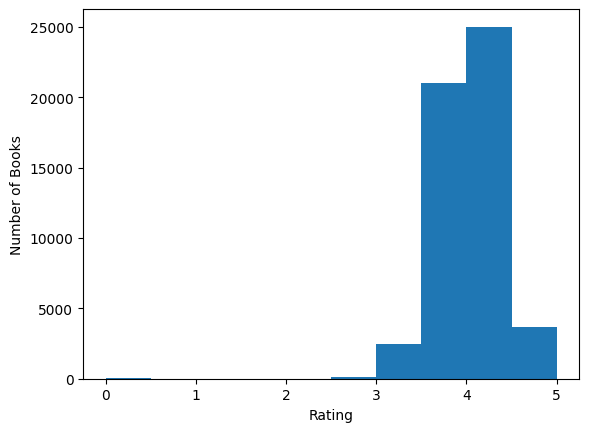

In [35]:
# plot a histogram of the ratings
plt.hist(books['rating'], bins=10)
plt.xlabel('Rating')
plt.ylabel('Number of Books')
plt.show()

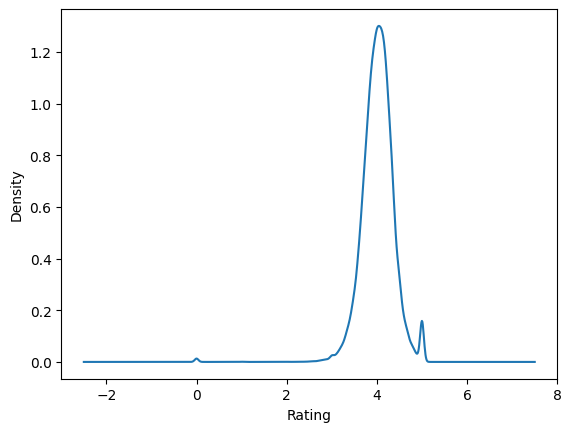

In [36]:
# plot a density plot of the ratings
books['rating'].plot(kind='density')
plt.xlabel('Rating')
plt.show()

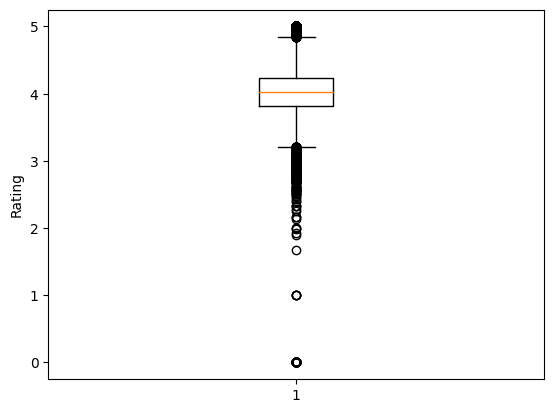

In [37]:
# plot boxplot of ratings
plt.boxplot(books['rating'])
plt.ylabel('Rating')
plt.show()

#### Relationship Analysis: 

In [38]:
# Calculate the correlation between rating, numRatings, and liked_pct
correlation = books[['rating', 'numRatings', 'liked_pct']].corr()
display(correlation)

,rating,numRatings,liked_pct
rating,1.000000,0.014872,0.121799
numRatings,0.014872,1.000000,0.032619
liked_pct,0.121799,0.032619,1.000000


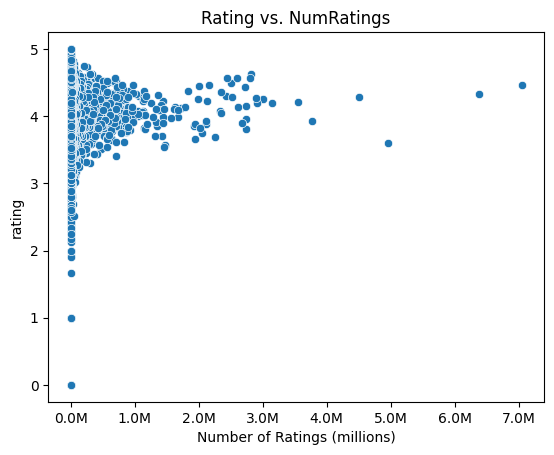

In [39]:
# Create a scatter plot of rating vs. numRatings
sns.scatterplot(x='numRatings', y='rating', data=books)
plt.xlabel('Number of Ratings (millions)')
# Format the x-axis tick labels to show values in millions
formatter = mtick.FuncFormatter(lambda x, pos: '{:.1f}M'.format(x/1e6))
plt.gca().xaxis.set_major_formatter(formatter)
plt.title('Rating vs. NumRatings')
plt.show()

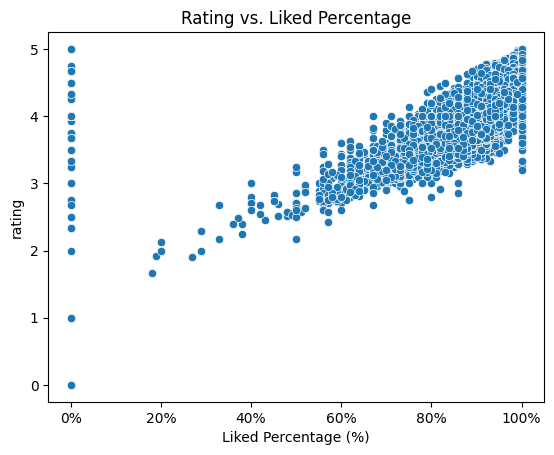

In [40]:
# Create a scatter plot of rating vs. liked_pct
sns.scatterplot(x='liked_pct', y='rating', data=books)
plt.xlabel('Liked Percentage (%)')
# Format the x-axis tick labels to show percentages
xmax = books['liked_pct'].max()
formatter = mtick.PercentFormatter(xmax=xmax)
plt.gca().xaxis.set_major_formatter(formatter)
plt.title('Rating vs. Liked Percentage')
plt.show()

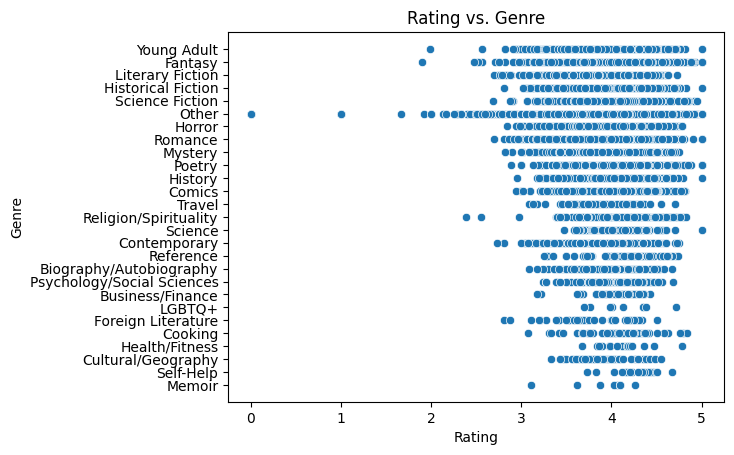

In [41]:
# Create a scatter plot of rating vs. genre (using the map_genres function)
sns.scatterplot(x='rating', y='genre', data=books)
plt.xlabel('Rating')
plt.ylabel('Genre')
plt.title('Rating vs. Genre')
plt.show()

#### ANOVA: Rating vs. Genre

ANOVA results for genres with over 100 books: F = 139.72594385477888, p = 0.0.

These results indicate that there are significant differences in ratings among the genres with over 100 books in the dataset.

In [42]:
# Get the number of books for each genre
genre_counts = books['genre'].value_counts()
genre_counts_filtered = genre_counts[genre_counts > 100]  # Filter genres with over 100 books
print(genre_counts_filtered)

Other                         22346
Fantasy                        6207
Romance                        4800
Young Adult                    3375
Mystery                        2783
Historical Fiction             2231
Science Fiction                1728
Horror                         1683
Literary Fiction               1548
Comics                         1193
History                        1062
Poetry                          944
Contemporary                    872
Religion/Spirituality           440
Science                         323
Psychology/Social Sciences      207
Biography/Autobiography         189
Travel                          136
Name: genre, dtype: int64


In [43]:
# Perform ANOVA to test for differences in means between genres
from scipy.stats import f_oneway

# Perform group analysis by genre
genres = list(genre_map.keys())

# Filter genres with over 100 books
filtered_genres = [genre for genre in genres if books['genre'].isin(genre_map[genre]).sum() > 100]

# Filter ratings by genre and keep only the filtered genres
ratings_by_genre = [books[books['genre'].isin(genre_map[genre])]['rating'] for genre in filtered_genres]

# Check if there are enough genres for analysis
if len(filtered_genres) > 1:
    # Compute ANOVA to test for differences in means between genres
    f_statistic, p_value = f_oneway(*ratings_by_genre)

    # Print the ANOVA results
    print(f'ANOVA results for genres with over 100 books: F = {f_statistic}, p = {p_value}')
else:
    print('There are no genres with over 100 books in the dataset.')

ANOVA results for genres with over 100 books: F = 139.72594385477888, p = 0.0


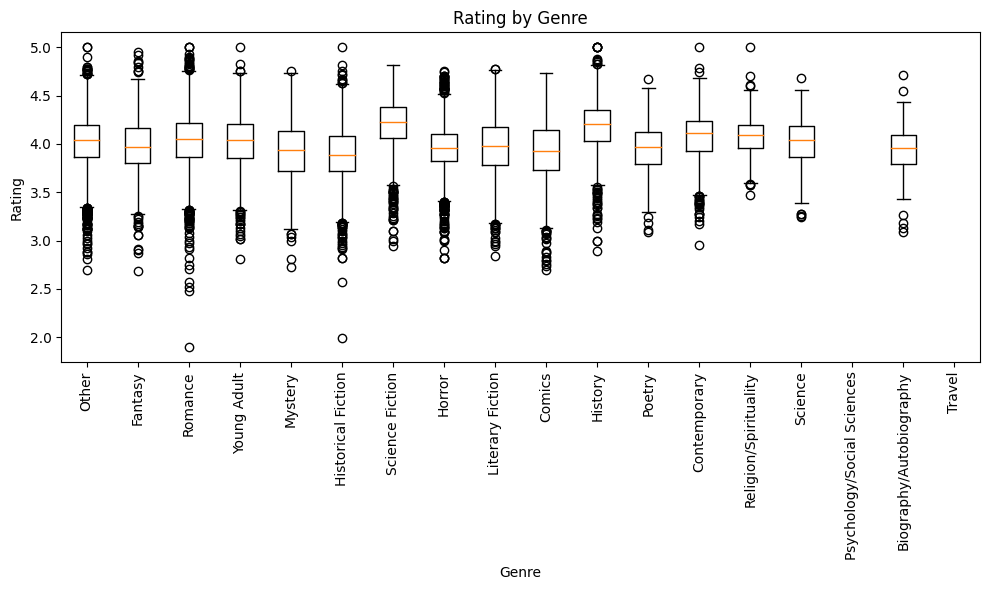

In [44]:
import matplotlib.pyplot as plt

# Perform group analysis by genre
genres = list(genre_map.keys())
ratings_by_genre = [books[books['genre'].isin(genre_map[genre])]['rating'] for genre in genres]

# Filter genres with over 100 books
genres_filtered = [genre for genre, count in genre_counts.items() if count > 100]
ratings_filtered = [rating for rating, genre in zip(ratings_by_genre, genres) if genre in genres_filtered]

# Plot the ANOVA results
plt.figure(figsize=(10, 6))
plt.boxplot(ratings_filtered, labels=genres_filtered)
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.title('Rating by Genre')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Time-based Analysis:

In [45]:
# Convert 'publishDate' to string format
books['publishDate'] = books['publishDate'].astype(str)

# Create a decades column
books['decade'] = books['publishDate'].str[:3] + '0s'

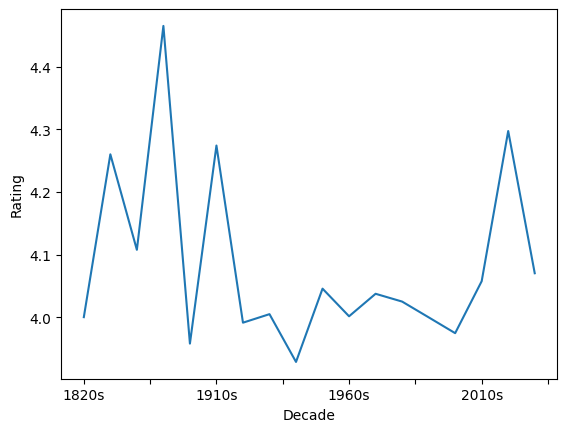

In [46]:
# Get the mean rating for each decade
ratings_by_decade = books.groupby('decade')['rating'].describe()['mean']

# Analyze the distribution of ratings over time by grouping them based on decades
books.groupby('decade')['rating'].mean().plot(kind='line')
plt.xlabel('Decade')
plt.ylabel('Rating')
plt.show()

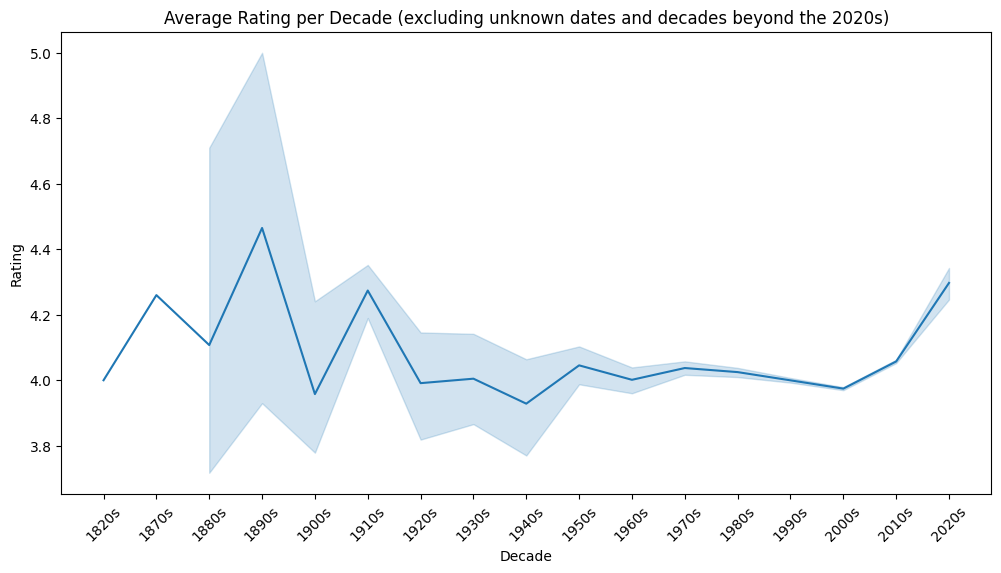

In [47]:
# Filter the books DataFrame to exclude rows with null values in the decade column
books_filtered = books[books['decade'].notnull()]

# Filter the books_filtered DataFrame to exclude decades beyond the 2020s
books_filtered = books_filtered[books_filtered['decade'] <= '2020s']

# Sort the decade column in ascending order
books_filtered.sort_values('decade', inplace=True)

# Create a new column with the decade as a categorical variable
books_filtered['decade_cat'] = pd.Categorical(books_filtered['decade'], categories=books_filtered['decade'].unique(), ordered=True)

# Plot the average rating per decade
fig = plt.figure(figsize=(12, 6))
sns.lineplot(x='decade_cat', y='rating', data=books_filtered)
plt.xlabel('Decade')
plt.ylabel('Rating')
plt.title('Average Rating per Decade (excluding unknown dates and decades beyond the 2020s)')
plt.xticks(rotation=45)
plt.show()

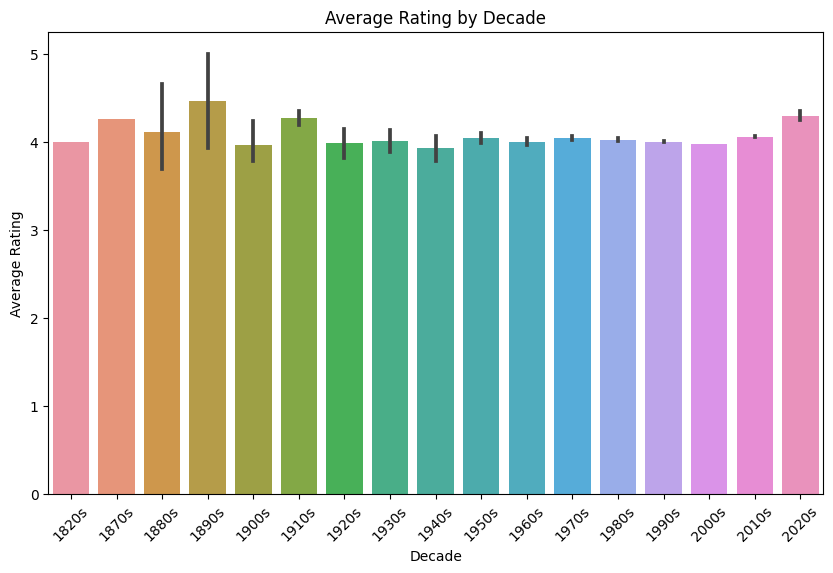

In [48]:
# Create a bar plot of average rating by decade
fig = plt.figure(figsize=(10, 6))
sns.barplot(x='decade', y='rating', data=books_filtered)
plt.xlabel('Decade')
plt.ylabel('Average Rating')
plt.title('Average Rating by Decade')
plt.xticks(rotation=45)
plt.show()

### Feature Variables Analysis

#### Title Analysis:

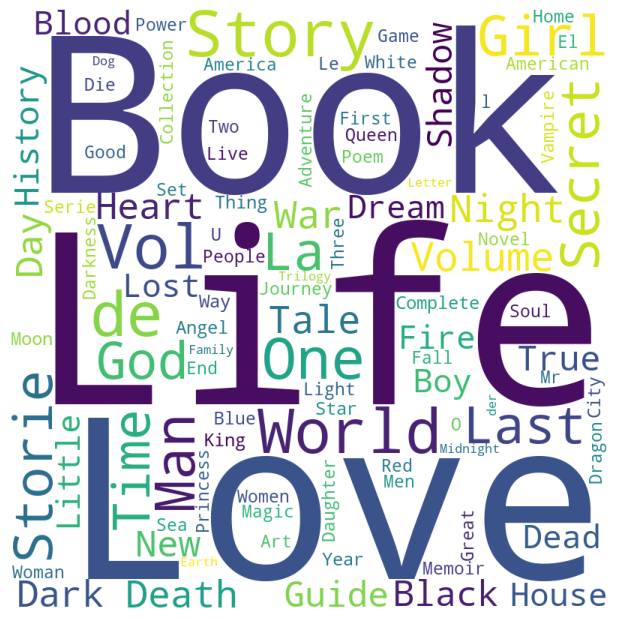

In [49]:
from wordcloud import WordCloud

# Create a word cloud of the most common words in the title column
title_wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=100, collocations=False).generate(' '.join(books['title']))

# Display the word cloud
plt.figure(figsize=(10, 6), facecolor=None)
plt.imshow(title_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

#### Author analysis:

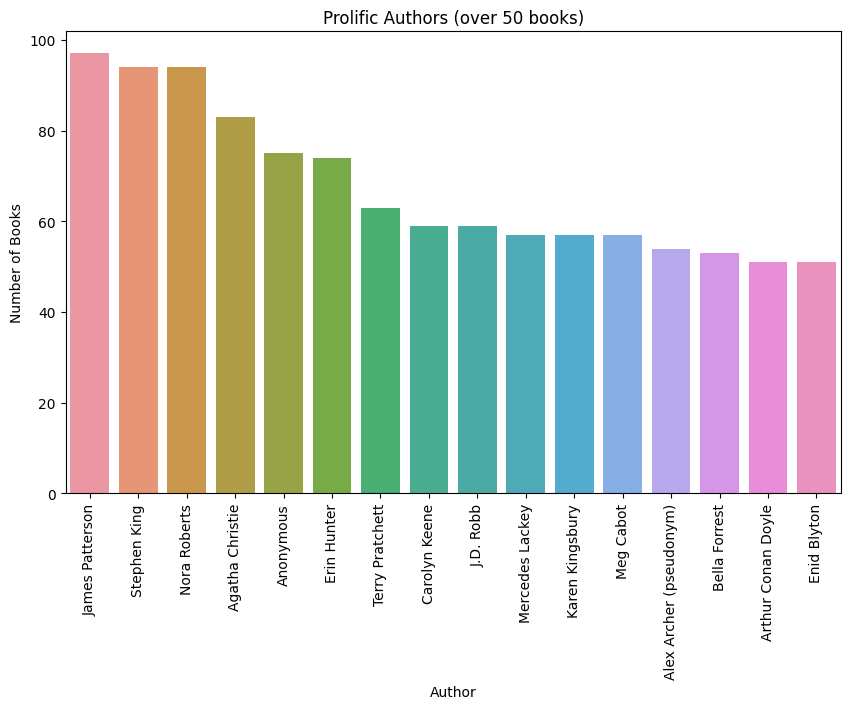

In [50]:
# Get the number of books for each author
author_counts = df['author'].value_counts()
author_counts_filtered = author_counts[author_counts > 50]  # Filter authors with over 50 books

# Plot the number of books for each author in a bar chart 
plt.figure(figsize=(10, 6))
sns.barplot(x=author_counts_filtered.index, y=author_counts_filtered.values)
plt.xlabel('Author')
plt.ylabel('Number of Books')
plt.title('Prolific Authors (over 50 books)')
plt.xticks(rotation=90)
plt.show()

In [51]:
# Calculate the average rating for books written by each author
author_ratings = books.groupby('author')['rating'].mean().reset_index()

# Identify authors with consistently high or low average ratings
high_rated_authors = author_ratings[author_ratings['rating'] >= 4.5]['author']
low_rated_authors = author_ratings[author_ratings['rating'] < 3.0]['author']

print('Authors with consistently high ratings:')
print(high_rated_authors[0:5], '\n')

print('Authors with consistently low ratings:')
print(low_rated_authors[0:5])

Authors with consistently high ratings:
12                     'Hmd jml ldyn rmDn
55                         A. Cort Sinnes
57                               A. Helwa
69                               A. White
74    A.C. Bhaktivedanta Swami Prabhupada
Name: author, dtype: object 

Authors with consistently low ratings:
17        'Hmd lbshry
20          'Hmd lwSl
138    A.N. Shekarnia
213     Abigail Stone
247       Adam Harkus
Name: author, dtype: object


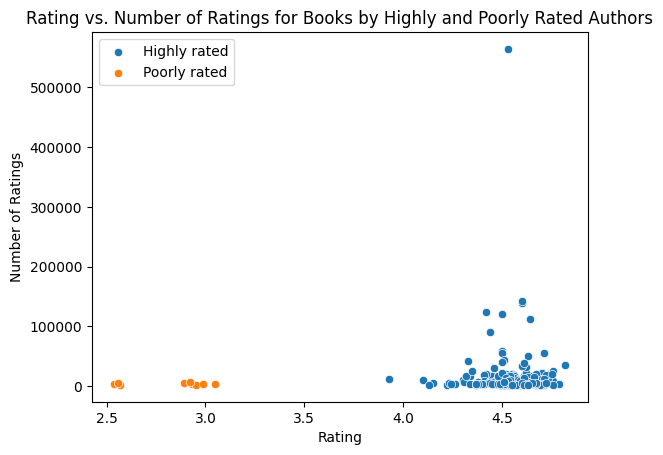

In [52]:
# filter the books DataFrame to include only books by high_rated_authors with over 2000 ratings
high_rated_books = books[(books['author'].isin(high_rated_authors)) & (books['numRatings'] > 2000)]

# filter the books DataFrame to include only books by low_rated_authors with over 2000 ratings
low_rated_books = books[(books['author'].isin(low_rated_authors)) & (books['numRatings'] > 2000)]

# Create a scatter plot of rating vs. number of ratings for high and low rated books
sns.scatterplot(x='rating', y='numRatings', data=high_rated_books, label='Highly rated')
sns.scatterplot(x='rating', y='numRatings', data=low_rated_books, label='Poorly rated')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.title('Rating vs. Number of Ratings for Books by Highly and Poorly Rated Authors')
plt.legend()
plt.show()

In [53]:
# Convert the genres list to a pandas Series
genres_series = pd.Series(genres)

# Create a new DataFrame with one row for each genre and author combination
genre_author_df = pd.DataFrame({'genre': genres_series.explode(), 'author': books['author']})

# Group the books by genre and author, and count the number of books by each author within each genre
genre_author_counts = genre_author_df.groupby(['genre', 'author']).size()

# Find the most popular author for each genre
most_popular_authors = genre_author_counts.groupby('genre').idxmax().reset_index()
most_popular_authors.columns = ['genre', 'Most Popular Author']

# Extract the author name from the tuple in the 'Most Popular Author' column
most_popular_authors['Most Popular Author'] = most_popular_authors['Most Popular Author'].str[1]

# Reset the index and create a new column for the index
most_popular_authors = most_popular_authors.reset_index(drop=True).rename_axis(None)

# Print the most popular author for each genre
display(most_popular_authors)

,genre,Most Popular Author
0,Biography/Autobiography,Emily Bronte
1,Business/Finance,Lewis Carroll
2,Comics,George Orwell
3,Contemporary,Stephenie Meyer
4,Cooking,Fyodor Dostoyevsky
5,Cultural/Geography,F. Scott Fitzgerald
6,Fantasy,Harper Lee
7,Foreign Literature,Shel Silverstein
8,Health/Fitness,Charlotte Bronte
9,Historical Fiction,Jane Austen


#### Language Analysis:

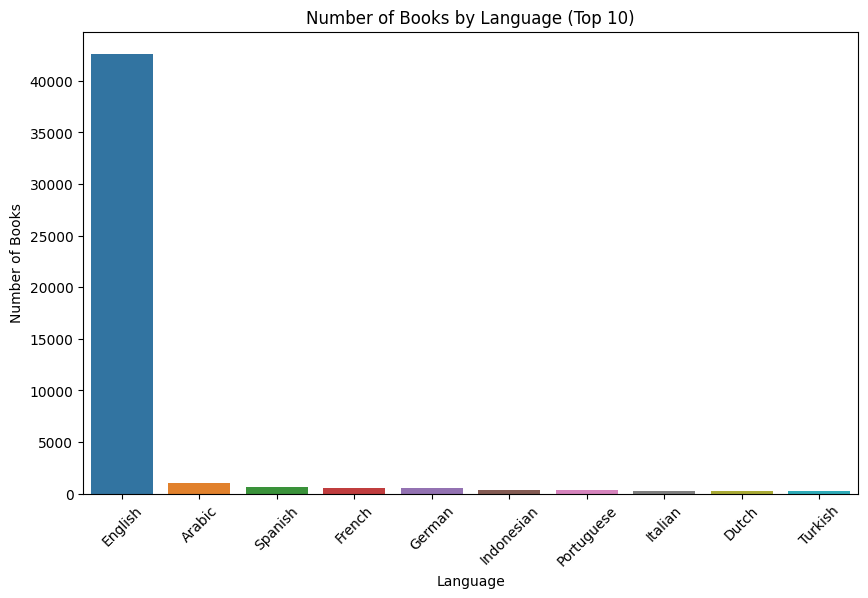

In [54]:
# Filter out books with an "Unknown" language label
books = books[books['language'] != 'Unknown']

# Get the number of books for each language
language_counts = books['language'].value_counts()

# Plot the number of books for 10 most popular languages
plt.figure(figsize=(10, 6))
sns.barplot(x=language_counts[:10].index, y=language_counts[:10].values)
plt.xlabel('Language')
plt.ylabel('Number of Books')
plt.title('Number of Books by Language (Top 10)')
plt.xticks(rotation=45)
plt.show()

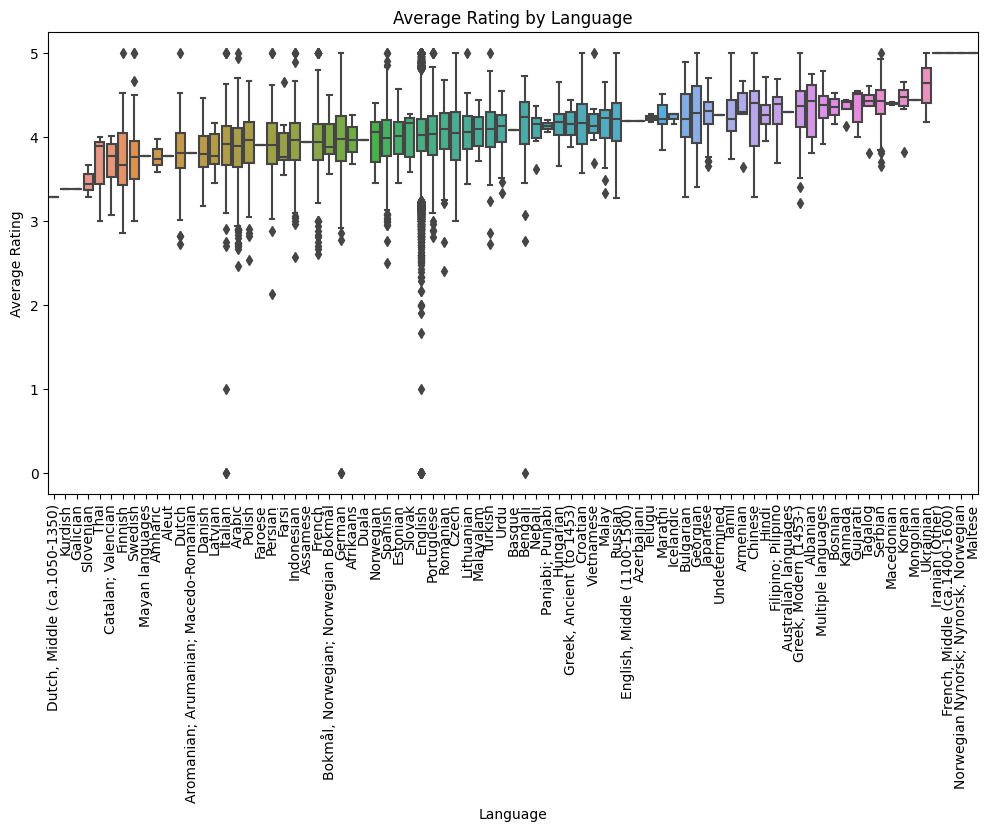

In [55]:
# Calculate the average rating for books in each language
avg_rating_by_language = books.groupby('language')['rating'].mean().sort_values()

# Visualize the average ratings using a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x=books['language'], y=books['rating'], order=avg_rating_by_language.index)
plt.xlabel('Language')
plt.ylabel('Average Rating')
plt.title('Average Rating by Language')
plt.xticks(rotation=90)
plt.show()

In [56]:
# Identify languages with higher or lower average ratings
highest_rated_language = avg_rating_by_language.index[-1]
lowest_rated_language = avg_rating_by_language.index[0]
print(f"The language with the highest average rating is {highest_rated_language}: {avg_rating_by_language[highest_rated_language]:.2f}")
print(f"The language with the lowest average rating is {lowest_rated_language}: {avg_rating_by_language[lowest_rated_language]:.2f}")

The language with the highest average rating is Maltese: 5.00
The language with the lowest average rating is Dutch, Middle (ca.1050-1350): 3.29


In [57]:
# Average rating for books in English
avg_rating_english = avg_rating_by_language['English']
print(f"The average rating for books in English is {avg_rating_english:.2f}")

The average rating for books in English is 4.02


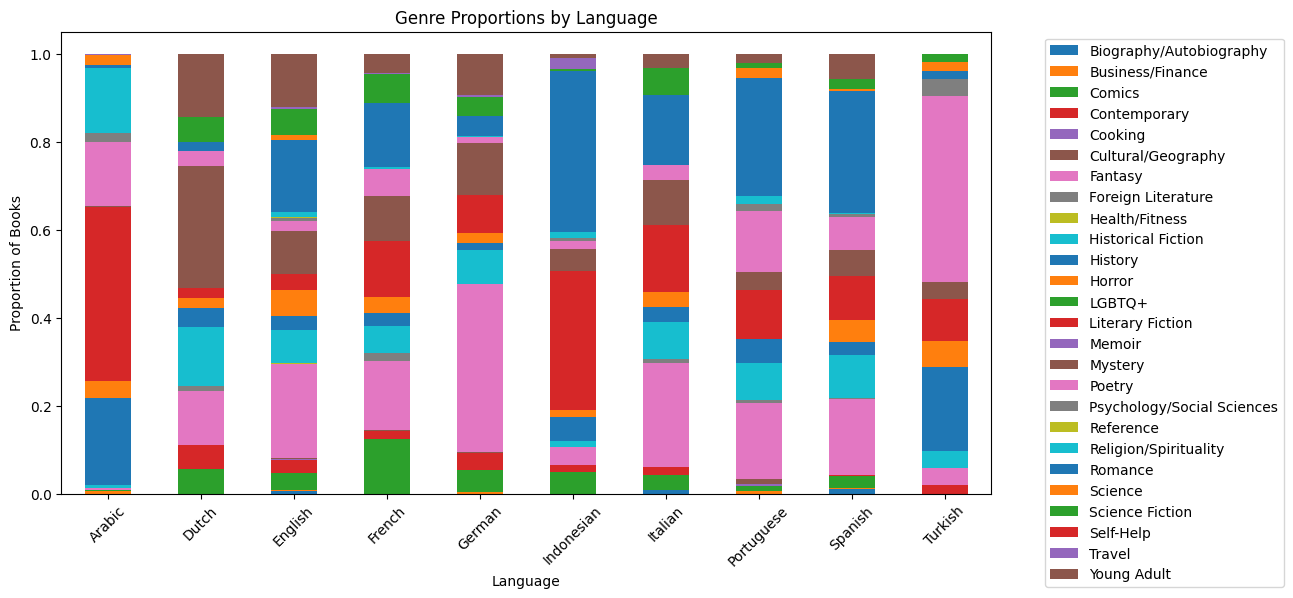

In [58]:
# Calculate the top 10 most popular languages by the number of books
top_languages = books.groupby('language').size().sort_values(ascending=False).head(10)

# Filter the genre counts by the top languages
genre_counts_by_language = books[books['language'].isin(top_languages.index)].explode('genre').groupby(['language', 'genre']).size().unstack().fillna(0)

# Exclude the "Other" genre from the genre counts
genre_counts_by_language = genre_counts_by_language.drop(columns=['Other'])

# Calculate the proportion of each genre for each language
genre_proportions_by_language = genre_counts_by_language.div(genre_counts_by_language.sum(axis=1), axis=0)

# Create a stacked bar chart of the genre proportions for each language
genre_proportions_by_language.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Language')
plt.ylabel('Proportion of Books')
plt.title('Genre Proportions by Language')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

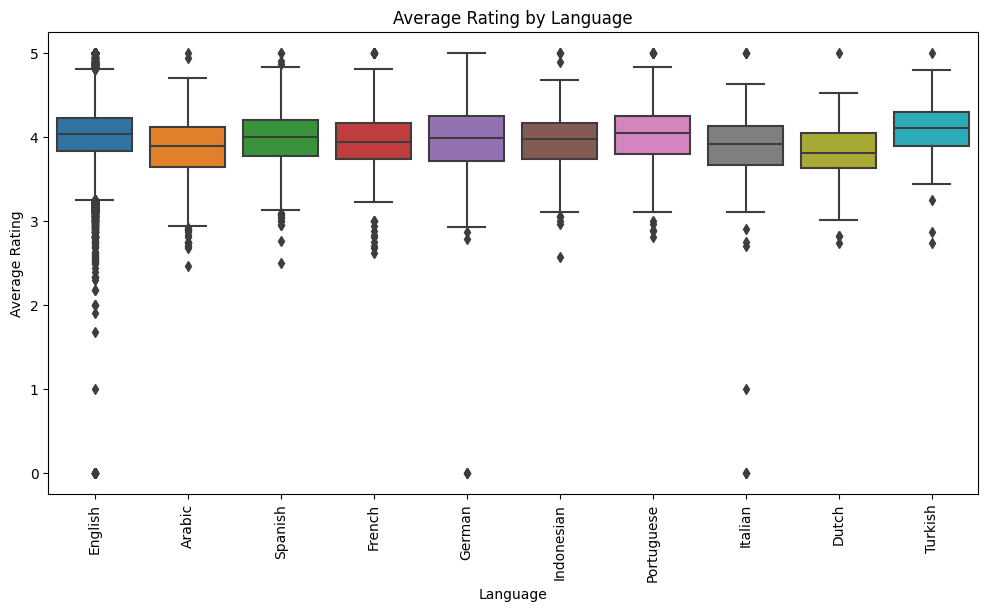

In [59]:
# Create box plots of the average rating and number of ratings for each language
plt.figure(figsize=(12, 6))
sns.boxplot(x='language', y='rating', data=books, order=top_languages.index)
plt.xlabel('Language')
plt.ylabel('Average Rating')
plt.title('Average Rating by Language')
plt.xticks(rotation=90)
plt.show()

#### Published Date Analysis:

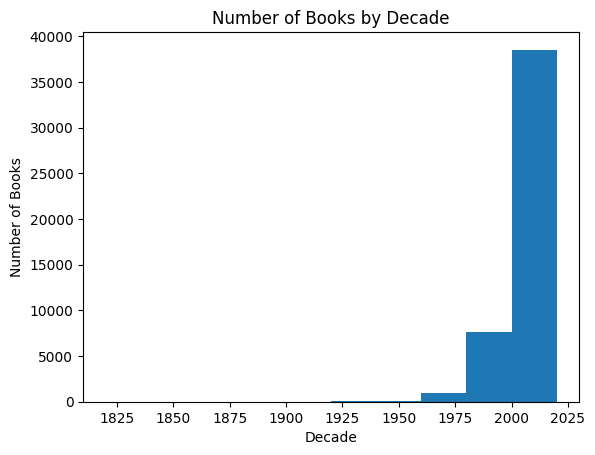

In [60]:
# Filter the books DataFrame to exclude rows with null values in the decade column
books_filtered = books[books['decade'].notnull()]

# Filter the books_filtered DataFrame to exclude decades beyond the 2020s
books_filtered = books_filtered[books_filtered['decade'] <= '2020s']

# Remove the 's' from the end of the decade column
books_filtered['decade'] = books_filtered['decade'].str[:-1]

# Convert the decade column to an integer type
books_filtered['decade'] = books_filtered['decade'].astype('int')

# Create a histogram of the decade column
plt.hist(books_filtered['decade'])
plt.xlabel('Decade')
plt.ylabel('Number of Books')
plt.title('Number of Books by Decade')
plt.show()

In [61]:
# Combine the numRatings and liked_pct features to create a new popularity feature
books['popularity'] = books['numRatings'] * (books['liked_pct'] / 100)

In [62]:
# Group the books by decade and find the most popular book for each decade
most_popular_books = books.groupby('decade')['popularity'].idxmax().reset_index(name='most_popular')

# Extract the title, author, publishDate, and popularity columns for each most popular book
most_popular_books = pd.merge(most_popular_books, books[['title', 'author', 'publishDate', 'popularity']], left_on='most_popular', right_index=True)

# Print the most popular book for each decade
display(most_popular_books[['decade', 'title', 'author', 'publishDate', 'popularity']])

,decade,title,author,publishDate,popularity
0,1820s,sh`lH `shq,Mir Taqi Mir,1820,5.00
1,1880s,Ten Days in a Mad-House,Nellie Bly,1887,11492.94
2,1890s,The Cloister and the Hearth,Charles Reade,1896,275.44
3,1900s,Ozma of Oz,L. Frank Baum,1907,20912.18
4,1910s,Daddy-Long-Legs,Jean Webster,1912,44142.70
5,1920s,Flappers and Philosophers,F. Scott Fitzgerald,1920,4415.04
6,1930s,The Story of Ferdinand,Munro Leaf,1936,82368.00
7,1940s,The Black Stallion,Walter Farley,1941,66658.56
8,1950s,The Sun Also Rises,Ernest Hemingway,1957,325627.86
9,1960s,The Giving Tree,Shel Silverstein,1964,851387.14


#### Description Sentiment Analysis:

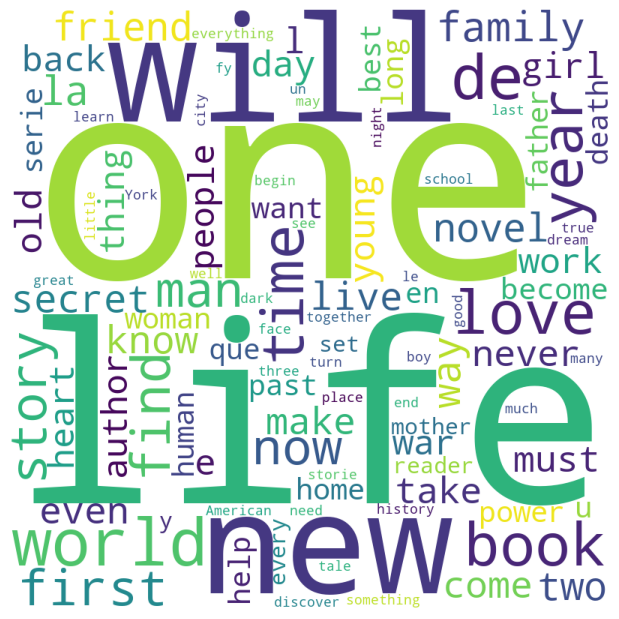

In [63]:
# Create a word cloud of the most common words in the description column
from wordcloud import WordCloud

# Create a word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=100, collocations=False).generate(' '.join(books['description']))

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

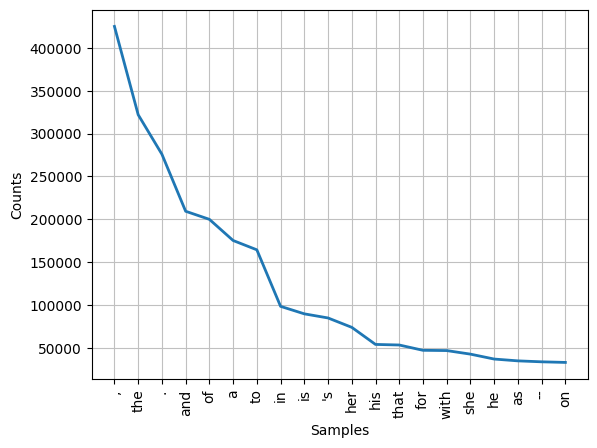

In [64]:
import nltk
from nltk.probability import FreqDist

# Tokenize the words in the description column
tokens = nltk.word_tokenize(' '.join(books['description']))

# Create a frequency distribution of the tokens
fdist = FreqDist(tokens)

# Plot the 20 most common words in the description column
fdist.plot(20)
plt.show()

In [65]:
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
nltk.download('stopwords')


# Text Preprocessing
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    # Remove punctuation and special characters
    text = text.replace('[^\w\s]','')
    # Convert text to lowercase
    text = text.lower()
    # Tokenize the text into individual words
    tokens = nltk.word_tokenize(text)
    # Remove stopwords
    tokens = [token for token in tokens if token not in stop_words]
    # Join the tokens back into a string
    text = ' '.join(tokens)
    return text

books['clean_description'] = books['description'].apply(preprocess_text)

# Sentiment Lexicons
analyzer = SentimentIntensityAnalyzer()

def get_sentiment_scores(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound']

books['sentiment_scores'] = books['clean_description'].apply(get_sentiment_scores)

# Sentiment Scoring
books['sentiment'] = pd.cut(books['sentiment_scores'], bins=[-1, -0.1, 0.1, 1], labels=['negative', 'neutral', 'positive'])

[nltk_data] Downloading package vader_lexicon to C:\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to C:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [66]:
from IPython.display import display

# Output the results in a table
display(books[['title', 'clean_description', 'sentiment_scores', 'sentiment']])

,title,clean_description,sentiment_scores,sentiment
0,The Hunger Games,winning means fame fortune.losing means certai...,-0.9124,negative
1,Harry Potter and the Order of the Phoenix,door end silent corridor . 's haunting harry p...,-0.4767,negative
2,To Kill a Mockingbird,unforgettable novel childhood sleepy southern ...,0.8126,positive
3,Pride and Prejudice,alternate cover edition isbn 9780679783268sinc...,0.9932,positive
4,Twilight,"three things absolutely positive . first , edw...",0.9230,positive
...,...,...,...,...
52419,Fractured,"fateful trilogy continues fractured . , 's cal...",-0.9260,negative
52420,Anasazi,"'anasazi ' , sequel 'the thirteenth chime ' em...",0.0000,neutral
52421,Marked,-- readers favorite awards winner 2011 -- sixt...,0.9246,positive
52422,Wayward Son,powerful tremor unearths ancient secretburied ...,-0.8555,negative


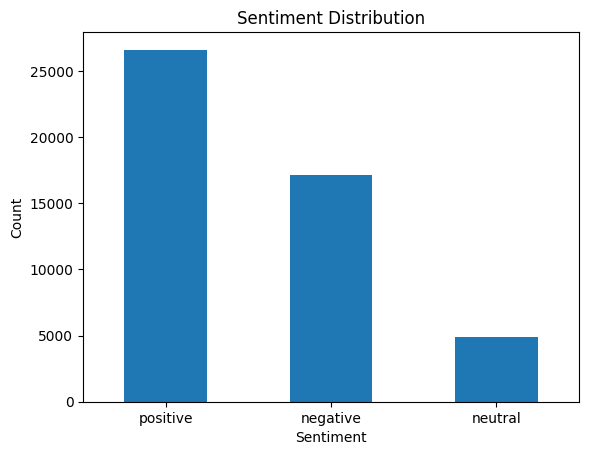

In [67]:
# Sentiment Visualization
sentiment_counts = books['sentiment'].value_counts()
sentiment_counts.plot(kind='bar', title='Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [70]:
# Remove the original description column
books.drop('description', axis=1, inplace=True)

# Reorder the columns
books = books[['title', 'author', 'genre', 'decade', 'rating', 'liked_pct', '5_stars',
               '4_stars', '3_stars', '2_stars', '1_star', 'language', 'numRatings',
               'isbn', 'pages', 'publishDate', 'coverImg', 'clean_description',
               'sentiment_scores', 'sentiment']]

# Save the updated dataset to a new CSV file
books.to_csv('dataset/final.csv', index=False)